## Loading The Data By Using Pandas

In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("/content/dataset_Electric_Vehicle.csv")
df = pd.DataFrame(file)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


- **This code is helping to check How many rows and columns**

In [3]:
df.shape

(13282, 17)

- **This code is helping to check data types like (categorical = "object", numerical(continuous) = "int", However one more column its "float")**

In [4]:
df.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


- **Checking Null or Missing values**

In [5]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [6]:
import warnings
warnings.filterwarnings("ignore")

- **filling missing values**

In [7]:
df["Model"].fillna(df["Model"].mode()[0],inplace=True)

In [8]:
df["Legislative District"].fillna(df["Legislative District"].median(),inplace=True)

In [9]:
df["Vehicle Location"].fillna(df["Vehicle Location"].mode()[0],inplace=True)

In [10]:
df["Electric Utility"].fillna(df["Electric Utility"].mode()[0],inplace=True)

In [11]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


- **Univarient Analysis On Numeric Columns**

In [12]:
numeric = df.select_dtypes(include="number")

In [13]:
def univarient_numeric(numeric_data):
    for col in numeric_data:
        print("*"*10, col ,"*"*10)
        stats = numeric_data[col].agg(["min","max","mean","median","std","skew","kurt"])
        print(stats)

univarient_numeric(numeric)

********** Postal Code **********
min        6443.000000
max       99403.000000
mean      98140.322391
median    98118.000000
std        2701.812689
skew        -26.599515
kurt        756.024201
Name: Postal Code, dtype: float64
********** Model Year **********
min       2010.000000
max       2023.000000
mean      2019.004969
median    2020.000000
std          2.873951
skew        -0.780550
kurt        -0.262898
Name: Model Year, dtype: float64
********** Electric Range **********
min         0.000000
max       337.000000
mean       88.926818
median     33.000000
std       102.703684
skew        0.792982
kurt       -0.925164
Name: Electric Range, dtype: float64
********** Base MSRP **********
min            0.000000
max       184400.000000
mean        1734.687924
median         0.000000
std        10472.765633
skew           6.801484
kurt          54.765228
Name: Base MSRP, dtype: float64
********** Legislative District **********
min        1.000000
max       49.000000
mean      30.04

In [14]:
import matplotlib.pyplot as plt

## Univarient Analysis on Numeric Columns How data Is disturbuted by using Box Plot

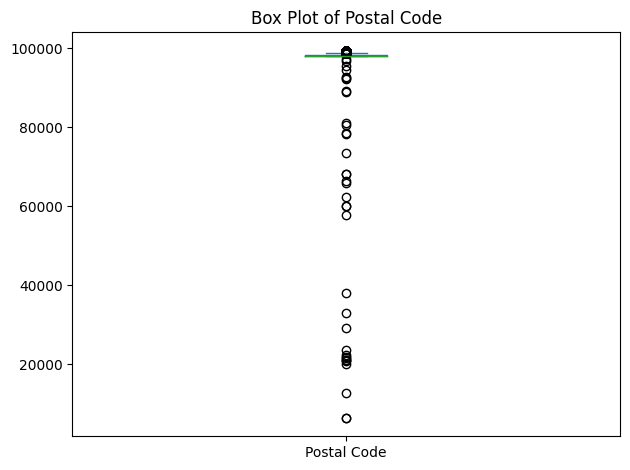

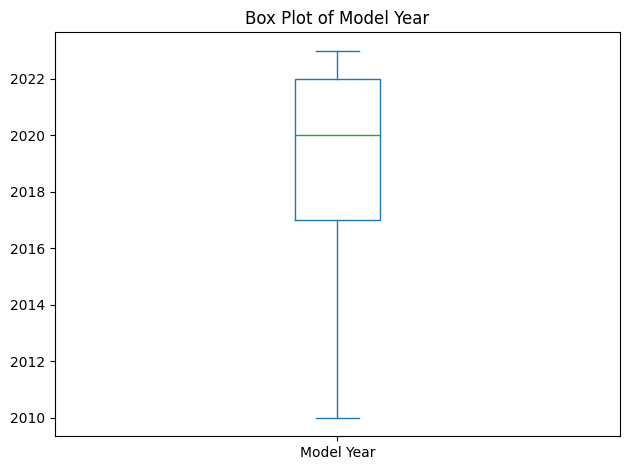

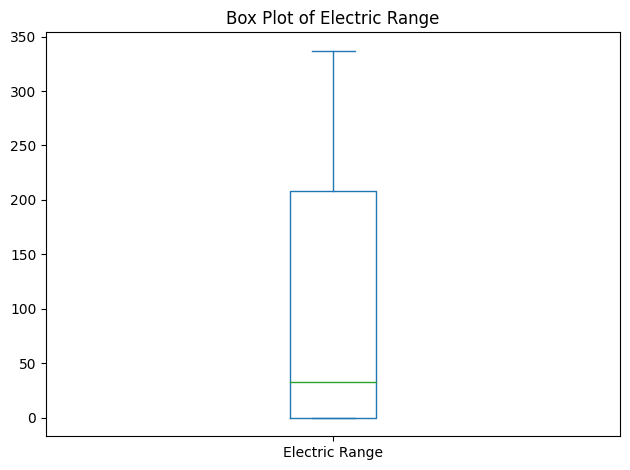

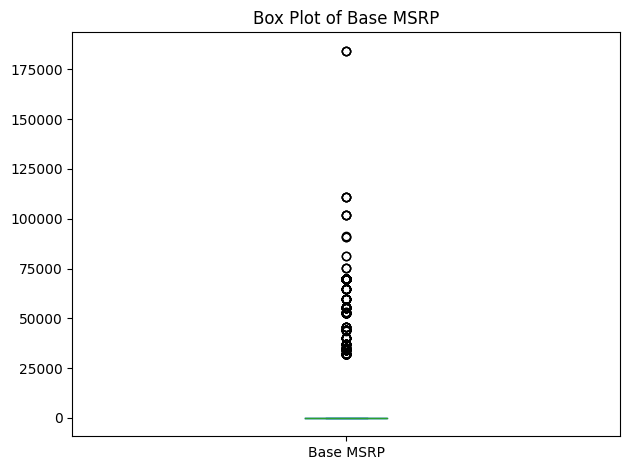

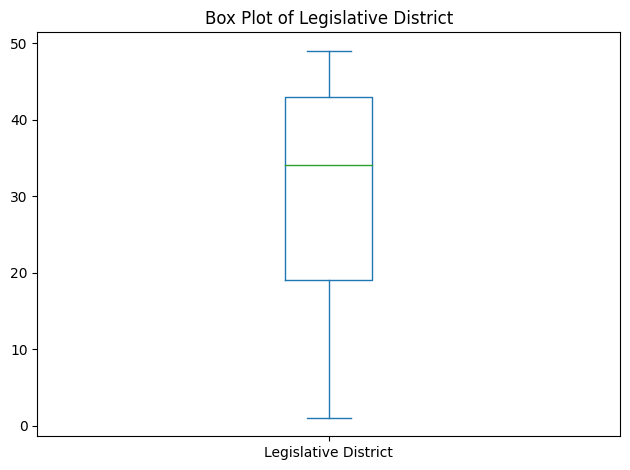

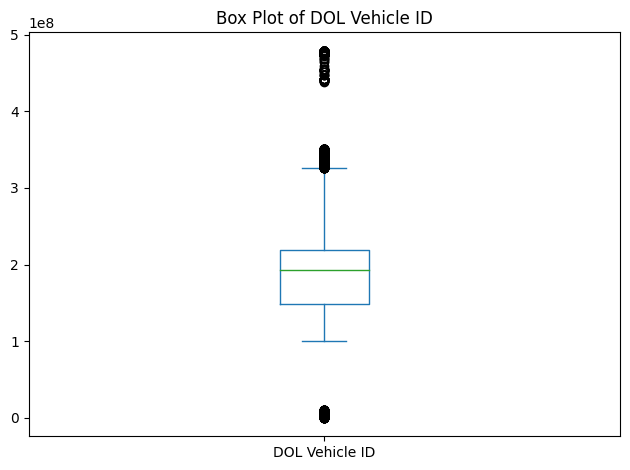

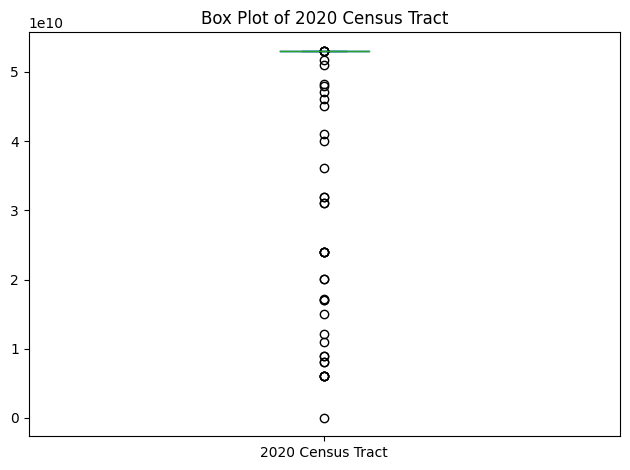

In [15]:
def visualization(numeric_data):
    for col in numeric_data.columns:
        numeric_data[col].plot(kind="box")
        plt.title(f"Box Plot of {col}")
        plt.tight_layout()
        plt.show()


visualization(numeric)

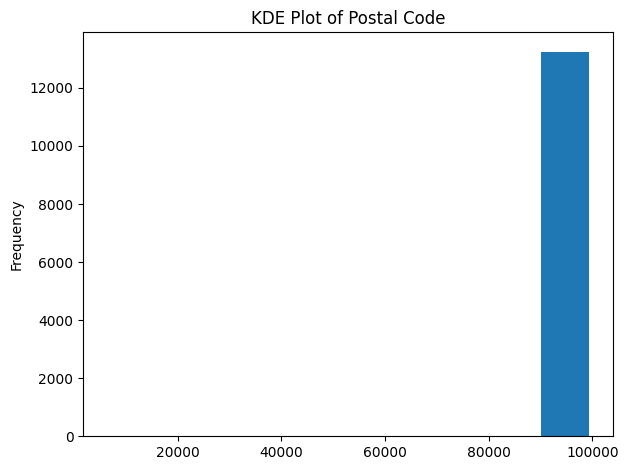

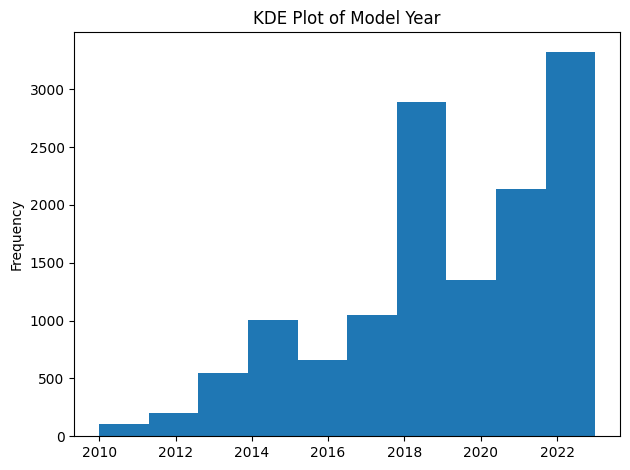

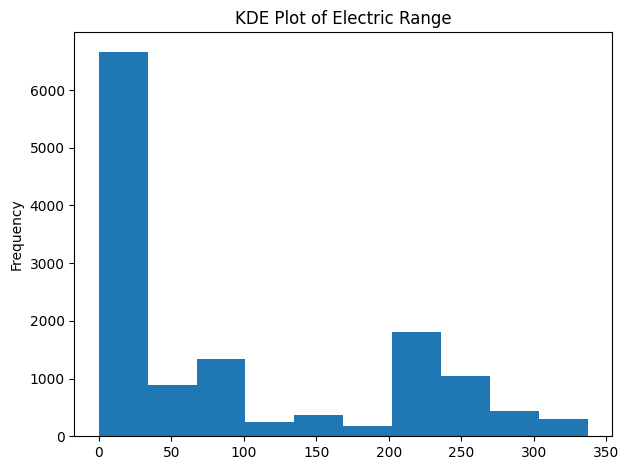

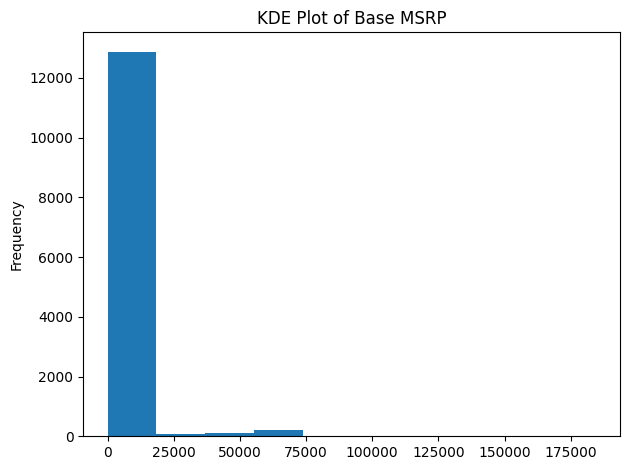

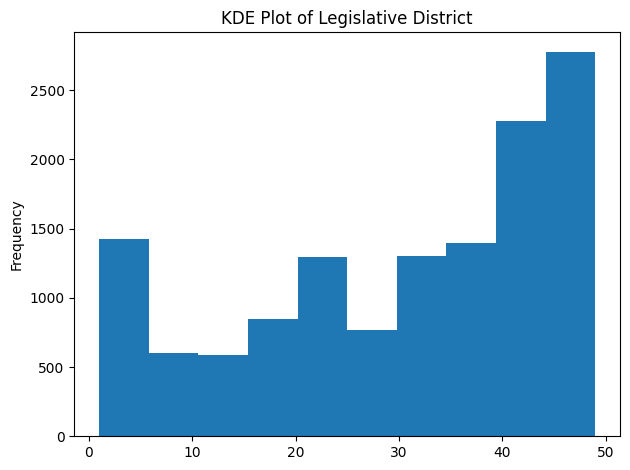

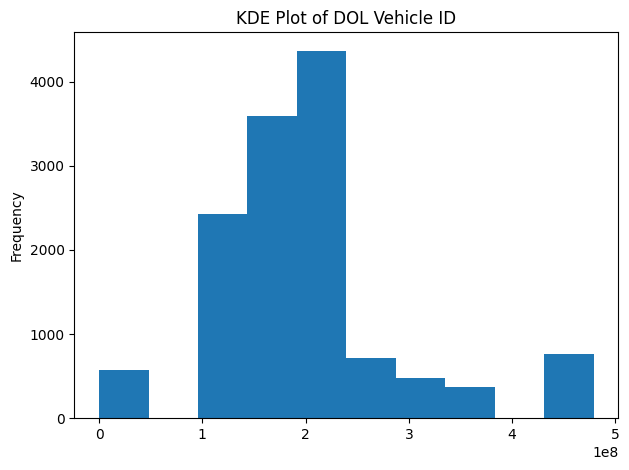

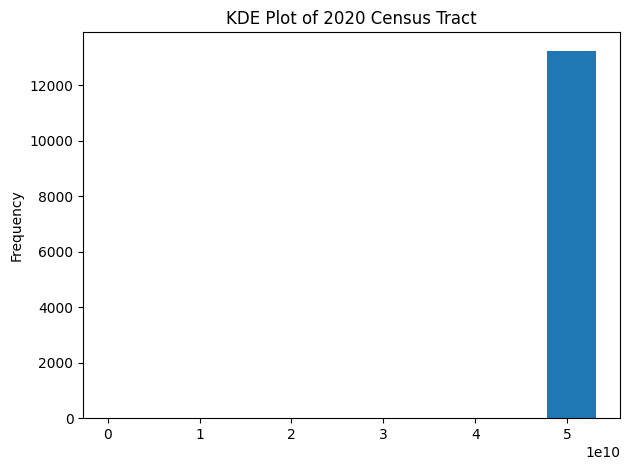

In [16]:
def visualization(numeric_data):
    for col in numeric_data.columns:
        numeric_data[col].plot(kind="hist")
        plt.title(f"KDE Plot of {col}")
        plt.tight_layout()
        plt.show()


visualization(numeric)

- **Performaing Univarte analysis on Categorical data**

In [17]:
categorical = df.select_dtypes(include="object")

## **Unique**

- **This tells us unique values are are present the data**

## **Nunique**

- **This tells us how many uniques values are present in the data**

In [18]:
def univarient_cat(cat_data):
    for i in cat_data:
        print("*"*10, i ,"*"*10)
        print("Unique values:",cat_data[i].unique())
        print("Nunique values:",cat_data[i].nunique())
        print("--------------------------------------------------------")

univarient_cat(categorical)

********** VIN (1-10) **********
Unique values: ['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... '5YJSA1E28K' 'WBY8P2C00M'
 '3C3CFFGE0D']
Nunique values: 3804
--------------------------------------------------------
********** County **********
Unique values: ['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo' 'Pend Oreille' 'Bexar'
 'Garfield' 'Pennington' 'Honolulu' 'Anne Arundel'

## The county with the highest population is King, followed by Snohomish and Pierce. The remaining counties have significantly smaller populations, with many having only 1 individual.

In [19]:
df["County"].value_counts()

,count
County,
King,6984
Snohomish,1505
Pierce,955
Clark,779
Thurston,601
...,...
Jackson,1
Newport News,1
Saratoga,1


In [20]:
df["City"].value_counts()

,count
City,
Seattle,2308
Bellevue,757
Kirkland,557
Redmond,545
Vancouver,484
...,...
Nooksack,1
Las Vegas,1
Aliso Viejo,1


In [21]:
df["State"].value_counts().head(10)

,count
State,
WA,13246
MD,5
CA,5
IL,3
VA,2
TX,2
KS,2
NE,2
NV,2


In [22]:
df["Model"].value_counts()

,count
Model,
MODEL 3,2671
MODEL Y,2024
LEAF,1529
MODEL S,852
BOLT EV,658
...,...
CITY,2
TUCSON,2
EQS-CLASS SUV,2


## **Visulization_categorical**

## the popularity of different electric car models. The most popular model is the Model 3, followed by the Model Y. The least popular models are the i3 and Niro. The overall popularity of electric cars seems to be increasing, as evidenced by the relatively high sales of the Model 3 and Model Y.

<Axes: ylabel='Model'>

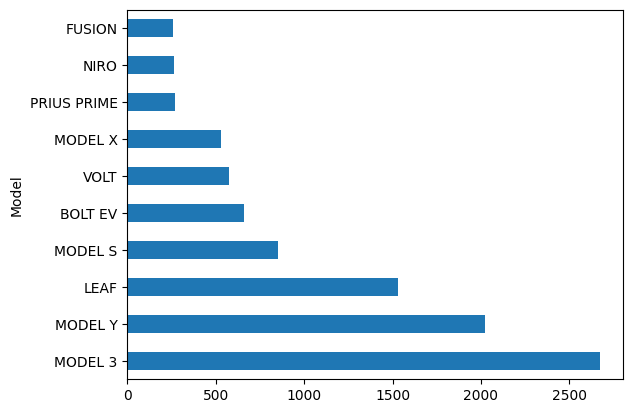

In [23]:
df["Model"].value_counts().head(10).plot(kind = "barh")

## the distribution of electric vehicle types. The majority of electric vehicles are Battery Electric Vehicles (BEV), while a smaller portion are Plug-in Hybrid Electric Vehicles (PHEV). This suggests that BEVs are currently more popular among consumers, potentially due to factors such as longer range and lower operating costs.

<Axes: ylabel='Electric Vehicle Type'>

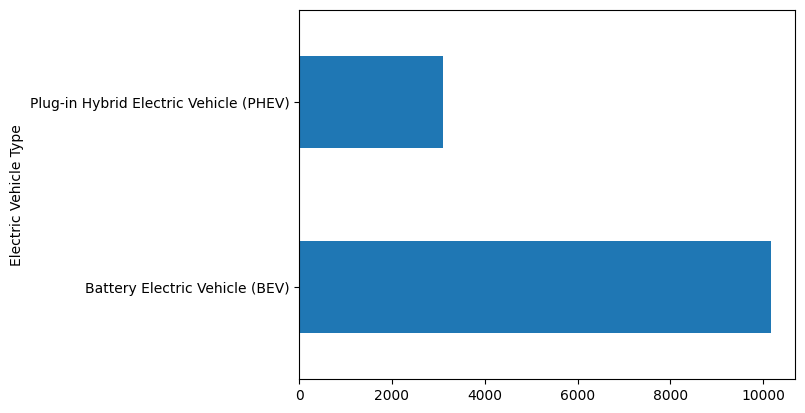

In [24]:
df["Electric Vehicle Type"].value_counts().plot(kind = "barh")

## the eligibility of different electric vehicles for Clean Alternative Fuel Vehicle (CAFV) incentives. The majority of vehicles are eligible, while some are ineligible due to low battery range. A significant number of vehicles have not been researched for battery range, and their eligibility is therefore unknown. This suggests that there is a need for more information on electric vehicle battery ranges to determine their eligibility for CAFV incentives.

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

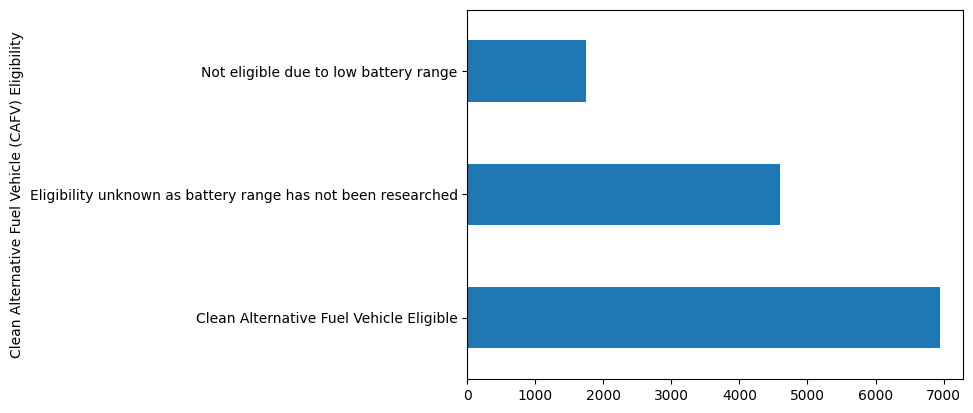

In [25]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().plot(kind = "barh")

## Bi Varient Analysis

### Numeric Vs Numeric

In [26]:
numeric.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,34.0,198968248,12087972100
1,89029,2013,38,0,34.0,5204412,32003005702
2,98901,2011,73,0,15.0,218972519,53077001602
3,98237,2017,238,0,39.0,186750406,53057951101
4,98201,2019,26,0,38.0,2006714,53061041500


In [27]:
correlation = df['Electric Range'].corr(df['Model Year'])

print("Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':", correlation)

Pearson Correlation Coefficient between 'Electric Range' and 'Model Year': -0.28778901976626625


In [28]:
correlation = df['Electric Range'].corr(df['Base MSRP'])

print("Pearson Correlation Coefficient between 'Electric Range' and 'Base MSRP':", correlation)

Pearson Correlation Coefficient between 'Electric Range' and 'Base MSRP': 0.07331343543151392


In [29]:
import seaborn as sns

<Axes: xlabel='Electric Range', ylabel='Model Year'>

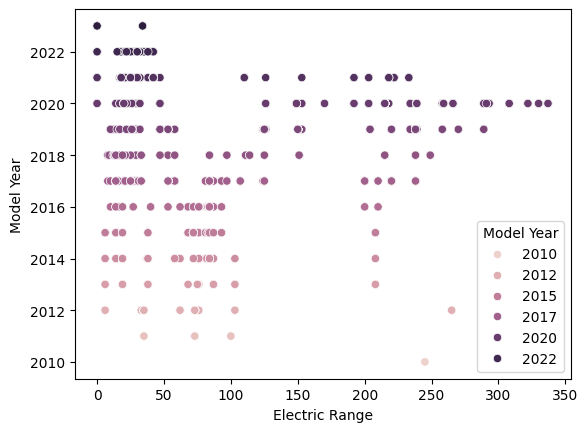

In [30]:
sns.scatterplot(df,x= df["Electric Range"],y=df["Model Year"],hue=df["Model Year"])

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

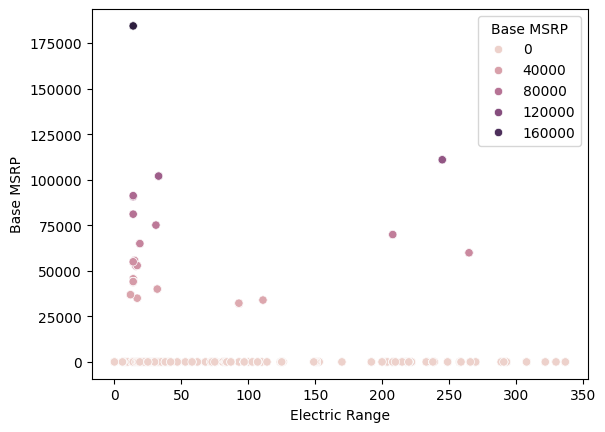

In [31]:
sns.scatterplot(df,x=df["Electric Range"],y = df["Base MSRP"],hue = df["Base MSRP"])

## Categorical Vs Numerical

In [32]:
df.groupby(by = "Make")["Model Year"].value_counts()

Make   Model Year
AUDI   2022          81
       2021          77
       2019          48
       2017          29
       2018          26
                     ..
VOLVO  2018          36
       2019          21
       2020          18
       2016          14
       2017           5
Name: count, Length: 187, dtype: int64

In [33]:
df.groupby(by = "Make")["Electric Range"].mean().head(10)

,Electric Range
Make,
AUDI,65.326733
BMW,49.656489
CADILLAC,33.666667
CHEVROLET,118.137715
CHRYSLER,32.418605
FIAT,85.742857
FISKER,33.000000
FORD,15.716502
GENESIS,0.000000


In [34]:
df.groupby(by = ["Make","County"])["Model Year"].value_counts()

Make   County   Model Year
AUDI   Benton   2022          2
                2021          1
       Chelan   2017          1
                2018          1
                2019          1
                             ..
VOLVO  Whatcom  2019          1
                2020          1
                2021          1
                2022          1
       Yakima   2021          1
Name: count, Length: 1739, dtype: int64

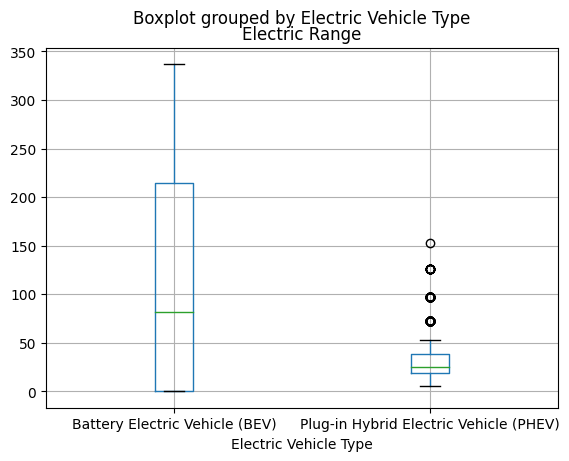

In [35]:
df.boxplot(column="Electric Range", by = "Electric Vehicle Type")#figsize = (8,6))
plt.show()

## Categorical Vs Categorical

In [36]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,34.0,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [37]:
cross_tab = pd.crosstab(df["Make"],df["County"]).count()

In [38]:
cross_tab

,0
County,
Adams,32
Anne Arundel,32
Asotin,32
Benton,32
Bexar,32
...,...
Walla Walla,32
Washington,32
Whatcom,32


In [39]:
grouped_df = df.groupby(by=["Make", "Model"])


pd.crosstab(index=df["County"], columns=[df["Make"], df["Model"]])

Make         AUDI                                                       BMW  \
Model          A3 A7 A8 E E-TRON E-TRON GT E-TRON SPORTBACK Q4 Q5 Q5 E 330E   
County                                                                        
Adams           0  0    0      0         0                0  0  0    0    0   
Anne Arundel    0  0    0      0         0                0  0  0    0    0   
Asotin          0  0    0      0         0                0  0  0    0    0   
Benton          0  0    0      1         0                0  0  1    1    1   
Bexar           0  0    0      0         0                0  0  0    0    0   
...           ... ..  ...    ...       ...              ... .. ..  ...  ...   
Walla Walla     0  0    0      0         0                0  0  0    0    0   
Washington      0  0    0      0         0                0  0  0    0    0   
Whatcom         3  0    0      2         0                0  0  2    1    0   
Whitman         0  0    0      0         0                0  0  0    0    0   
Yakima          1  0    0      0         0                0  0  0    1    1   

Make          ...     TOYOTA VOLKSWAGEN      VOLVO                             
Model         ... RAV4 PRIME     E-GOLF ID.4   C40 S60 S90 V60 XC40 XC60 XC90  
County        ...                                                              
Adams         ...          0          0    0     0   0   0   0    0    0    0  
Anne Arundel  ...          0          0    0     0   0   0   0    0    0    0  
Asotin        ...          0          0    0     0   0   0   0    0    0    0  
Benton        ...          6          0    2     0   1   0   0    0    0    1  
Bexar         ...          0          0    0     0   0   0   0    0    0    0  
...           ...        ...        ...  ...   ...  ..  ..  ..  ...  ...  ...  
Walla Walla   ...          1          1    0     0   0   0   0    0    0    0  
Washington    ...          0          0    0     0   0   0   0    0    0    0  
Whatcom       ...          2          1    5     0   0   0   0    2    1    2  
Whitman       ...          0          1    1     0   0   0   0    0    0    0  
Yakima        ...          0          0    4     0   0   0   0    0    0    1  

[68 rows x 101 columns]

<Axes: xlabel='Make'>

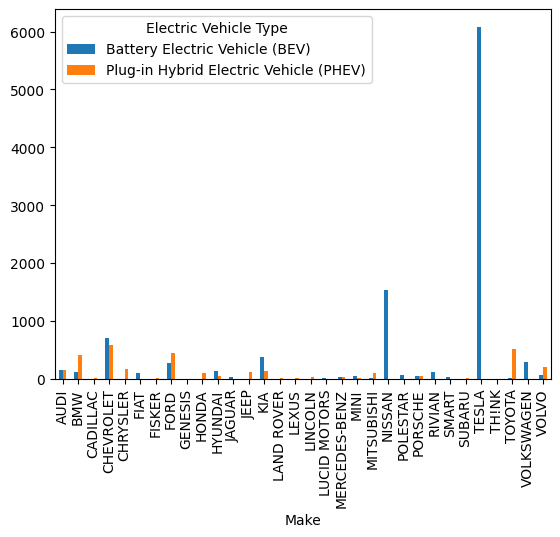

In [40]:
pd.crosstab(index=df["Make"],columns=df["Electric Vehicle Type"]).plot(kind = "bar")

## Create a Choropleth using plotly.express to display the number of EV vehicles based on location.



## ploty installation

In [41]:
pip install plotly

In [42]:
import plotly.express as px

In [43]:
ev_count_per_state = df.groupby('State').size().reset_index(name='ev_count')

In [44]:
ev_count_per_state.head(10)

,State,ev_count
0,CA,5
1,CO,2
2,CT,2
3,DC,1
4,FL,1
5,HI,1
6,IL,3
7,KS,2
8,MD,5
9,NE,2


In [45]:
fig = px.choropleth(ev_count_per_state,
                    locations='State',  # Column representing state locations
                    locationmode="USA-states",  # Use USA state-level mapping
                    color='ev_count',  # Column representing the count of EVs
                    scope="usa",  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale
                    title='Number of EV Vehicles by State')

fig.show()

### Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [46]:
pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.6 MB/s eta 0:00:00


In [47]:
import bar_chart_race as bcr

In [48]:
make_counts_per_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [49]:
pivot_df = make_counts_per_year.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

In [50]:
bcr.bar_chart_race(df=pivot_df,
                   title='Electric Vehicles Make Count Over Time',

                    n_bars=10,

                   period_length=500,
)